# Author: ABSAR AHMED
# Task#3
# Object
- Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
- As a business manager, try to find out the weak areas where you canwork to make more profit.
- What all business problems you can derive by exploring the data?

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"F:\The Spark Foundation Dataset Csv\SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
df['Sales'].value_counts()

12.960     56
19.440     39
15.552     39
25.920     36
10.368     36
           ..
376.866     1
572.800     1
3.928       1
12.032      1
629.640     1
Name: Sales, Length: 5825, dtype: int64

In [6]:
pd.set_option('display.max_rows', df.shape[0]+1)

In [7]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:
df1 = df.drop(['Postal Code','Segment'], axis=1)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Country       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


In [10]:
df1.isnull().sum()

Ship Mode       0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
df1.shape

(9994, 11)

In [13]:
df1.nunique()

Ship Mode          4
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# Descriptive Statistics

In [14]:
df1.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [15]:
df1[df1.Sales==df1.Sales.min()]

,Ship Mode,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
4101,Standard Class,United States,Houston,Texas,Central,Office Supplies,Appliances,0.444,1,0.8,-1.11


In [16]:
df1[df1.Sales==df1.Sales.max()]

,Ship Mode,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,United States,Jacksonville,Florida,South,Technology,Machines,22638.48,6,0.5,-1811.0784


In [17]:
df1[df1.Profit==df1.Profit.max()]

,Ship Mode,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,United States,Lafayette,Indiana,Central,Technology,Copiers,17499.95,5,0.0,8399.976


In [18]:
df1[df1.Profit==df1.Profit.min()]

,Ship Mode,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,United States,Lancaster,Ohio,East,Technology,Machines,4499.985,5,0.7,-6599.978


In [19]:
grp = df1.groupby('City').get_group('Miami')

In [20]:
grp.head()

,Ship Mode,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
402,First Class,United States,Miami,Florida,South,Office Supplies,Paper,9.568,2,0.2,3.4684
633,Second Class,United States,Miami,Florida,South,Technology,Accessories,17.880,3,0.2,2.4585
634,Second Class,United States,Miami,Florida,South,Office Supplies,Labels,235.944,3,0.2,85.5297
1046,Standard Class,United States,Miami,Florida,South,Technology,Phones,1363.960,5,0.2,85.2475
1047,Standard Class,United States,Miami,Florida,South,Furniture,Furnishings,102.360,3,0.2,-3.8385


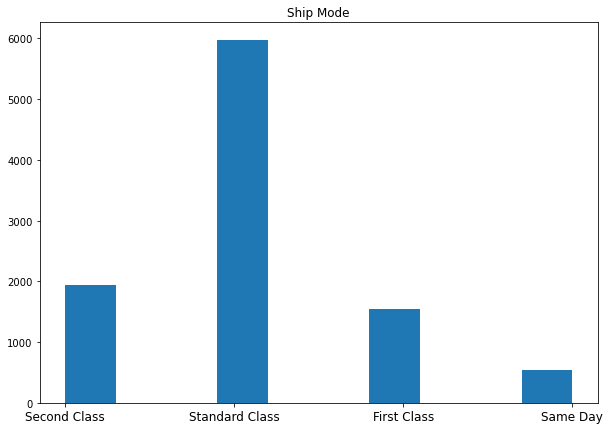

In [21]:
plt.figure(figsize=(10,7))
plt.title('Ship Mode')
plt.hist(df1['Ship Mode'])
plt.xticks(fontsize=12)
plt.show()

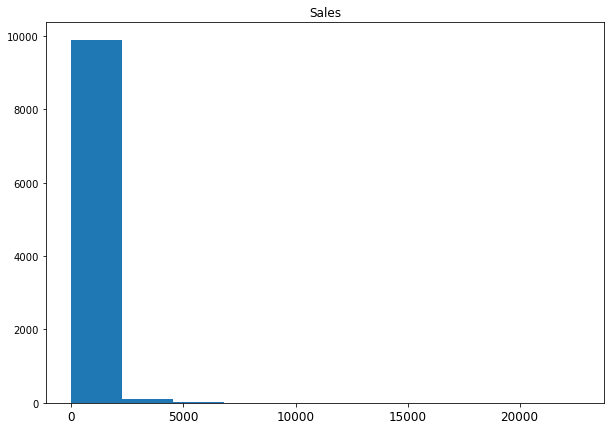

In [22]:
plt.figure(figsize=(10,7))
plt.title('Sales')
plt.hist(df1['Sales'])
plt.xticks(fontsize=12)
plt.show()

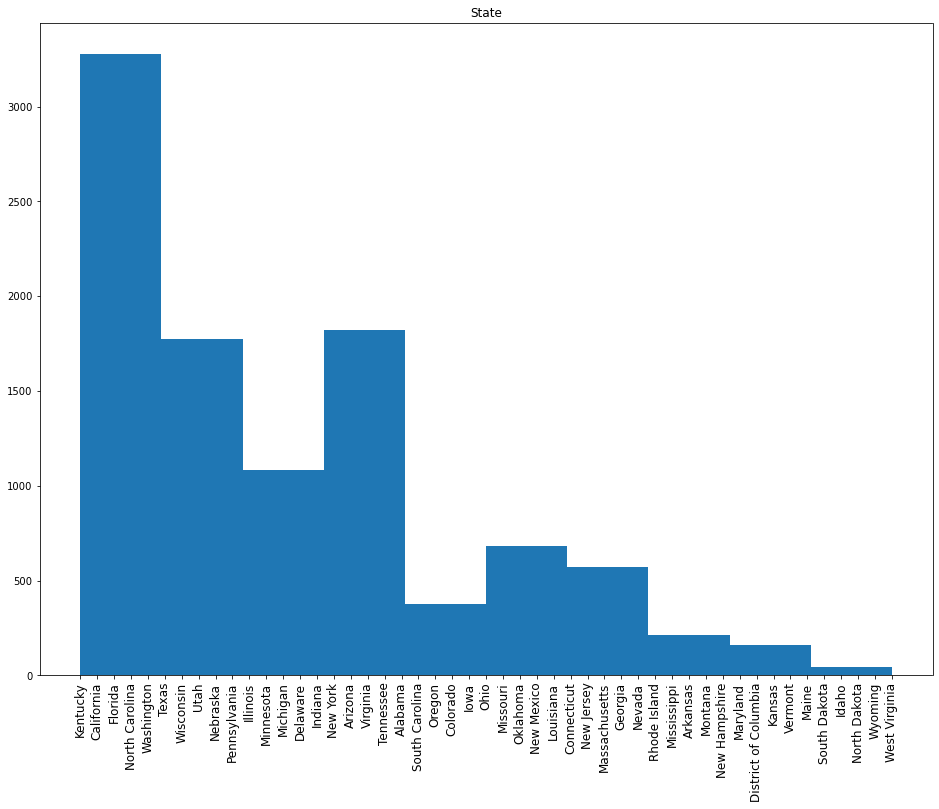

In [23]:
plt.figure(figsize=(16,12))
plt.title('State')
plt.hist(df1['State'])
plt.xticks(rotation=90, fontsize=12)
plt.show()

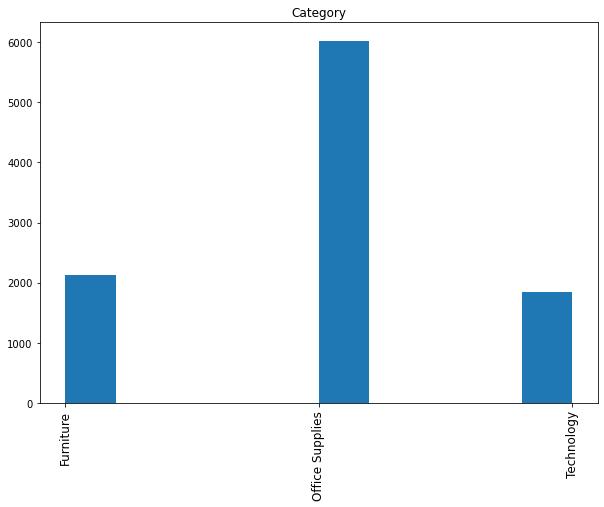

In [24]:
plt.figure(figsize=(10,7))
plt.title('Category')
plt.hist(df1['Category'])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [25]:
grp1 = df1.groupby('City')['Sales', 'Profit'].apply(sum)

<ipython-input-25-87e4adceff7f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp1 = df1.groupby('City')['Sales', 'Profit'].apply(sum)


In [26]:
grp1

,Sales,Profit
City,,
Aberdeen,25.5000,6.6300
Abilene,1.3920,-3.7584
Akron,2729.9860,-186.6356
Albuquerque,2220.1600,634.0881
Alexandria,5519.5700,318.6183
Allen,290.2060,-39.8775
Allentown,853.2520,-226.4504
Altoona,20.4510,-1.1835
Amarillo,3773.0628,-387.9683


In [27]:
loss =  df[df['Discount']==0.3]

In [28]:
loss

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.372,2,0.3,-1.0196
39,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Chairs,212.058,3,0.3,-15.1470
66,Standard Class,Home Office,United States,Chicago,Illinois,60610,Central,Furniture,Chairs,213.115,5,0.3,-15.2225
124,Second Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Chairs,600.558,3,0.3,-8.5794
167,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Furniture,Chairs,1740.060,9,0.3,-24.8580
177,Second Class,Consumer,United States,Newark,Ohio,43055,East,Furniture,Chairs,396.802,7,0.3,-11.3372
328,First Class,Consumer,United States,Philadelphia,Pennsylvania,19143,East,Furniture,Chairs,786.744,4,0.3,-258.5016
377,Standard Class,Corporate,United States,Franklin,Massachusetts,2038,East,Furniture,Tables,1488.424,7,0.3,-297.6848
436,Second Class,Home Office,United States,Chicago,Illinois,60623,Central,Technology,Machines,1007.979,3,0.3,43.1991
457,Standard Class,Consumer,United States,Decatur,Illinois,62521,Central,Furniture,Chairs,747.558,3,0.3,-96.1146


# Relationship Analysis

In [29]:
corelation= df1.corr()

In [30]:
corelation

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


<Figure size 720x720 with 0 Axes>

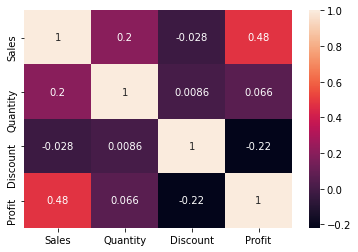

<Figure size 720x720 with 0 Axes>

In [31]:
sns.heatmap(df1.corr(),annot= True)
plt.figure(figsize=(10,10))


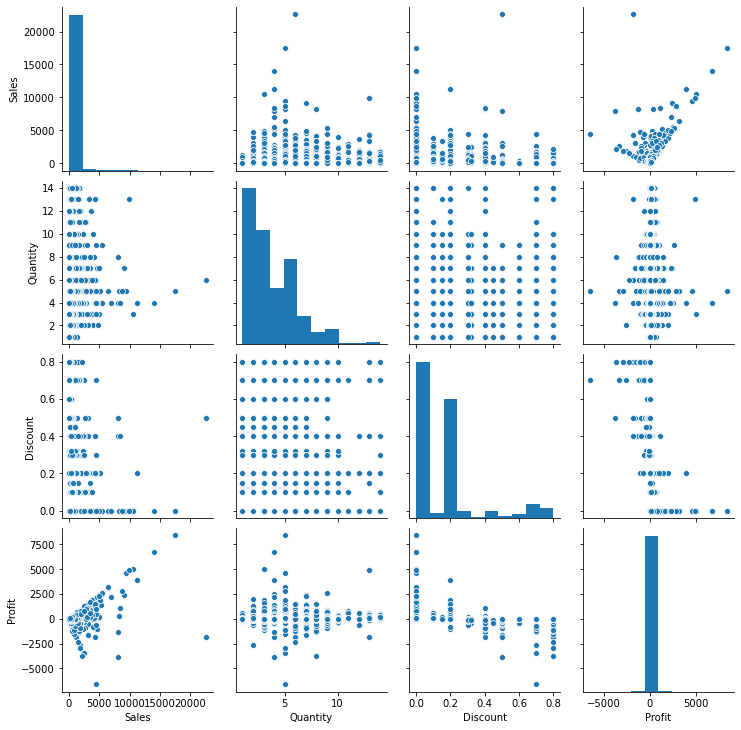

In [32]:
sns.pairplot(df1)
plt.show()

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000.]),
 <a list of 7 Text major ticklabel objects>)

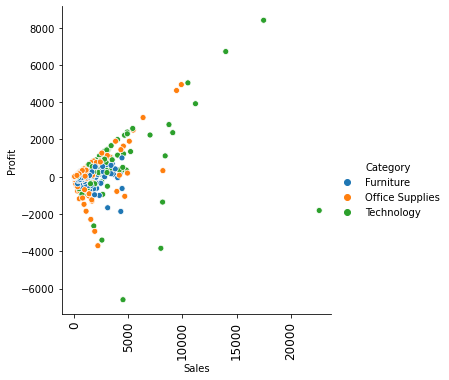

In [33]:
sns.relplot(x = 'Sales', y = 'Profit', hue= 'Category', data=df1)
plt.xticks(rotation=90, fontsize=12)


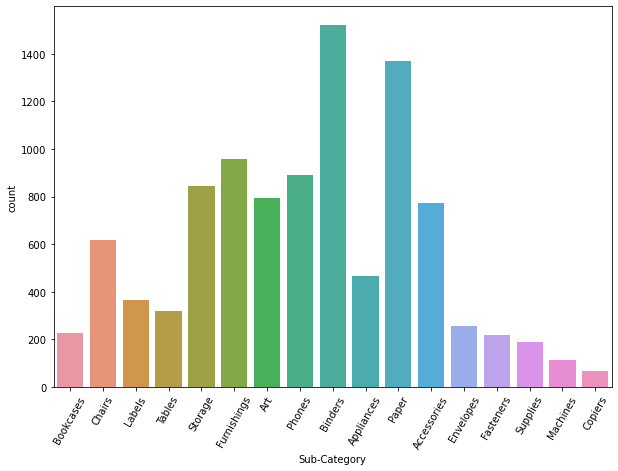

In [34]:
plt.figure(figsize=(10,7));
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=60, fontsize=10);

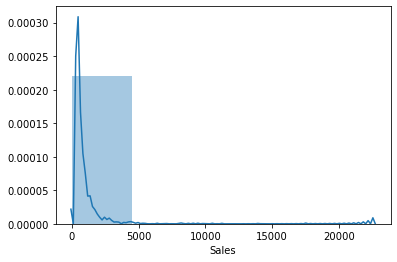

In [35]:
sns.distplot(df1['Sales'], bins=5)

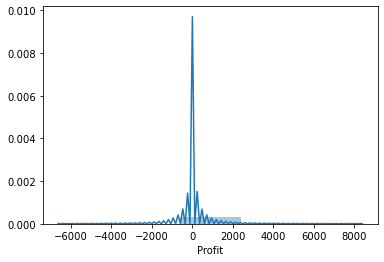

In [36]:
sns.distplot(df1['Profit'], bins=5)

In [37]:
import pandas as pd
from pandas_profiling import ProfileReport

#EDA using pandas-profiling
profile = ProfileReport(pd.read_csv(r"F:\The Spark Foundation Dataset Csv\SampleSuperstore.csv"), explorative=True)

#Saving results to a HTML file
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
profile

# Conclusion

More than 20% discount business goes in loss. Business is profitable to give 10-20%discount on sale.